# Linear Regression

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5 # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)     # Generate 100 residual terms
y = 2 + 0.3 * X + res                # Actual values of Y

In [10]:
df = pd.DataFrame({
  'X' : X,
  'y' : y,
})

df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


In [12]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean) ** 2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763


In [13]:
ypred = alpha + beta * X
ypred

array([3.91178282, 2.81064315, 3.27775989, 4.29675991, 3.99534802,
       1.69857201, 3.25462968, 2.36537842, 2.40424288, 2.81907292,
       2.60387001, 3.66168312, 3.10199975, 2.58581077, 2.84592918,
       2.75696825, 3.69382011, 2.32194218, 2.74033151, 1.79802302,
       0.42642221, 3.015275  , 3.18547843, 1.88839019, 4.32006116,
       1.31339555, 2.52451965, 2.33645381, 3.72506464, 3.67386219,
       2.61267323, 2.79288576, 1.77082341, 0.88838207, 2.20668994,
       2.61380476, 3.48085076, 3.45831697, 2.17486854, 2.24351265,
       1.64102813, 1.34112617, 1.11002064, 4.06253353, 2.07610925,
       2.1338976 , 1.47613319, 3.11528277, 1.18459738, 2.31582084,
       1.76462232, 2.79994197, 2.07517841, 1.53439407, 2.46482364,
       2.83338994, 2.54127917, 2.73177699, 1.9754571 , 2.19471775,
       1.94466613, 2.19729158, 1.83108353, 1.09386364, 2.6308214 ,
       2.16319902, 1.17143718, 2.86120343, 1.75506992, 2.52951462,
       3.07620724, 2.59171079, 3.40747079, 1.49064088, 2.81240

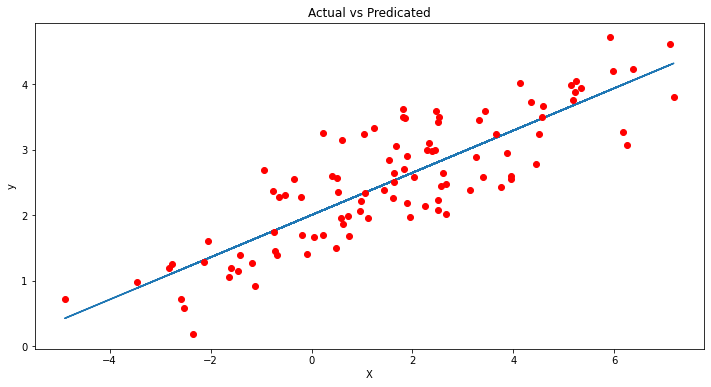

In [14]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)   # regression line
plt.plot(X, y, 'ro') # scatter plot showing actual data
plt.title('Actual vs Predicated')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [18]:
advert = pd.read_csv('./data/Advertising.csv')
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [22]:
import statsmodels.formula.api as smf

# initialize and fit linear regression model using statsmodels
model = smf.ols('Sales ~ TV', data = advert)
model = model.fit()
# alpha and beta are automatically calculate 
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

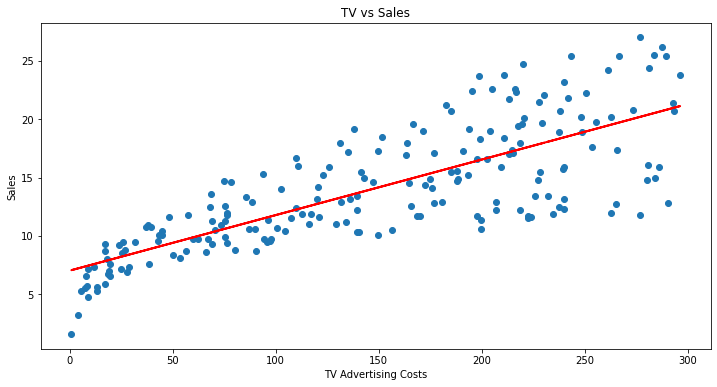

In [23]:
# Predict values
sales_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(advert['TV'], advert['Sales'], 'o') # scatter plot showing actual data
plt.plot(advert['TV'], sales_pred, 'r', linewidth = 2)
plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.show()

In [24]:
# Makings predictions
new_x = 400
model.predict({"TV": new_x})

0    26.04725
dtype: float64

In [25]:
from sklearn.linear_model import LinearRegression

# Build LR model with 2 predictors
# Split data into predictor X and output Y
predictors = ['TV', 'Radio']
X = advert[predictors]
y = advert['Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)


In [27]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')
model.predict(X)

alpha = 2.921099912405138
betas = [0.04575482 0.18799423]


array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

In [28]:
new_X = [[300, 200]]
print(model.predict(new_X))

[54.24638977]


/home/fonta42/anaconda3/envs/IA/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
